<a href="https://colab.research.google.com/github/flaviohahn/ApMaquina/blob/master/Prova_AM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**UNIVERSIDADE FEDERAL DE ALAGOAS**

**INSTITUTO DE COMPUTAÇÃO**

**ALUNO:** FLÁVIO OSCAR HAHN

**PROFS:** EVANDRO COSTA E XU YANG

**CURSO:** APRENDIZAGEM DE MAQUINA


**1) Dado os dados de Balança.csv, calcule a matriz de covariança e faça um scatter plot. Baseado na matriz e scatter plot, discuta a independência dos atributos.**

In [ ]:
#Realizando as importações
import pandas as pd
import numpy as np
import seaborn as sn

import matplotlib.pyplot as plt
#Criando o dataset:
urlBalanca = 'https://raw.githubusercontent.com/flaviohahn/ApMaquina/master/balance_scale_dataset.csv'
dados = pd.read_csv(urlBalanca)
dados.head(5)


,left_weight,left_distance,right_weight,right_distance,balance
0,1,1,1,1,B
1,1,1,1,2,R
2,1,1,1,3,R
3,1,1,1,4,R
4,1,1,1,5,R


In [ ]:
#Primeiro vamos calcular a matriz de covaiância usando a Numpy
X = dados.iloc[:,:-1].values
covariance = np.cov(X, rowvar=False)
display(covariance)

array([[2.00320513, 0.        , 0.        , 0.        ],
       [0.        , 2.00320513, 0.        , 0.        ],
       [0.        , 0.        , 2.00320513, 0.        ],
       [0.        , 0.        , 0.        , 2.00320513]])

In [ ]:
#Agora vamos calcular a matriz de covaiância usando a Pandas
df_covariance = dados.cov()
display(df_covariance)

,left_weight,left_distance,right_weight,right_distance
left_weight,2.003205,0.000000,0.000000,0.000000
left_distance,0.000000,2.003205,0.000000,0.000000
right_weight,0.000000,0.000000,2.003205,0.000000
right_distance,0.000000,0.000000,0.000000,2.003205


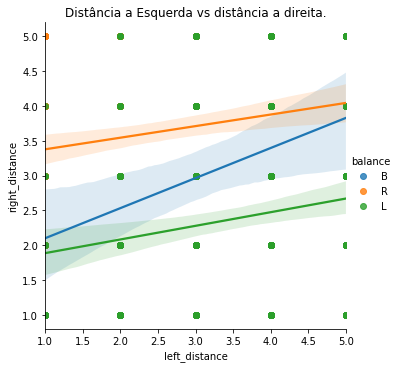

In [ ]:
#scatter plot
sn.lmplot(x='left_distance', y='right_distance', data=dados, 
           fit_reg=True, # No regression line
           hue='balance')   # Color by evolution stage

# cria um título para o gráfico
plt.title('Distância a Esquerda vs distância a direita.')

# mostra o gráfico
plt.show()

Os conjuntos se móstram com distânciamento uniforme e linearmente independente.

**2) Considere uma SVM cujos hiperplanos canônicos sejão H1 : w * x + b = 1 e H2 : w * x + b = -1. Demonstre que a maximização da margem de separação dos objetos em relação a w * x + b = 0 pode ser obtida pela minimização de |w|.**

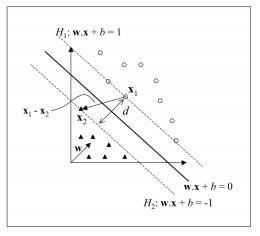

Seja x1 um ponto no hiperplano H1:w * x + b = 1 e x2 um ponto no hiperplano
H2: w * x + b = −1. Projetando x1 − x2 na direção de w,
perpendicular ao hiperplano separador w · x + b = 0, é possível obter a distância entre os hiperplanos H1 e H2 [6]. Essa projeção é apresentada na Equação  (x1 − x2) (w/||w|| * (x1-x2)/||(x1 - x2)||).

 A diferença entre a equação w * x + b = 1 e w * x + b = −1 forenece a equação w * x + b = 2. 

 Subistituindo esse resultado na equação temos:
 2(x1 - x2)/||x|| ||x1 - x2|| = 2/||x||

 Essa é a distância d, ilustrada na Figura, entre os hiperplanos H1 e H2, paralelos ao hiperplano separador. Como w e b foram escalados de forma a não haver exemplos entre H1 e H2, 1/||w|| é a distância mínima entre o hiperplano separador e os dados de treinamento. Essa distância é definida como a margem geométrica do classificador linear.
 
 A partir dassas considerações, verifica-se que a maximização da margem de separação dos dados em relação a w · x + b = 0 pode ser obtida pela minimização de ||w||.

**3) Dado os dados de Iris.csv:**

In [ ]:
#Realizando as importações
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

#Criando o dataset:
urlIris = 'https://raw.githubusercontent.com/flaviohahn/ApMaquina/master/iris_dataset.csv'
ds_iris = pd.read_csv(urlIris)
ds_iris.head(5)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,sepal_length,sepal_width,petal_length,petal_width,flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
ds_iris['flower'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: flower, dtype: int64

(a) Calcule a probabilidade a priori para cada classe.


In [ ]:
probabilidade_setosa = 50/150
display('Probabilidade Setosa:' ,probabilidade_setosa)
probabilidade_versicolor = 50/150
display('Probabilidade Setosa:' ,probabilidade_versicolor)
probabilidade_virginica = 50/150
display('Probabilidade Setosa:' ,probabilidade_virginica)

'Probabilidade Setosa:'

0.3333333333333333

'Probabilidade Setosa:'

0.3333333333333333

'Probabilidade Setosa:'

0.3333333333333333

(b) Para um objeto x = (4.8, 3.1, 1.5, 0.2), calcular a verossimilhança.


(c) Pelo Naive Bayes, qual classe o novo dado deve estar?

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

ds_iris.flower.replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [1, 2, 3], inplace=True)

#Initialize Gaussian Naive Bayes
clf = GaussianNB()

# Split-out validation dataset
array = ds_iris.values

X = array[:,0:4]
Y = array[:,4]

# One-third of data as a part of test set
validation_size = 0.33

seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)


#Fitting the training set
clf.fit(X_train, Y_train) 

#Predicting for the Test Set
pred_clf = clf.predict(X_validation)

count_vect = CountVectorizer()

predictionData = np.array([[4.8, 3.1, 1.5, 0.2]])
resultado =clf.predict(predictionData)

print(" --------------------")
print("1: Iris-setosa")
print("2: Iris-versicolor" )
print("3: Iris-virginica \n")

print("Resultado da Predição: ",resultado)

 --------------------
1: Iris-setosa
2: Iris-versicolor
3: Iris-virginica 

Resultado da Predição:  [1.]


**4) Para os dados de Balança, considere as questões seguintes:**

In [8]:
#Realizando as importações
import pandas as pd
import numpy as np
import requests
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import svm


#Criando o dataset:
urlBalanca = 'https://raw.githubusercontent.com/flaviohahn/ApMaquina/master/balance_scale_dataset.csv'
data = pd.read_csv(urlBalanca)
data.head(5)

,left_weight,left_distance,right_weight,right_distance,balance
0,1,1,1,1,B
1,1,1,1,2,R
2,1,1,1,3,R
3,1,1,1,4,R
4,1,1,1,5,R


A) Sugira uma rede neural para classificar (para 3 grupos) e explica as arquitetura e aprendizado (números de entradas, saídas, algoritmos de treinamento, etc ).

In [ ]:
data.count() # determina a quantidade de dados presente em cada classe

left_weight       625
left_distance     625
right_weight      625
right_distance    625
balance           625
dtype: int64

In [ ]:
#X determina os dados que serão analisados, dados recebidos do dataset.
X = data[['left_weight','left_distance','right_weight', 'right_distance']].values
#Y determina o resultado esperado 
Y = data['balance'].values
# separação dos dados em conjunto de treinamento e conjunto de teste, sendo 20% dos dados para teste;
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)


In [ ]:
#A classificação foi realizada pelo modelo SGD, foi informado o numero de neuronios ocultos (3) e definido o indice de aprendizagem de (0,1).
#Também foi definido o numero maximo de interações sendo de 1500.
# O esperimento gerou 88% de chances de sucesso.
NNclf = MLPClassifier(solver='sgd', hidden_layer_sizes=(3,), learning_rate_init=0.1, activation='logistic', max_iter=1500, random_state=1)
score = cross_val_score(NNclf, X, Y, cv = 5)
print("Cross Validation mean: {}".format(np.mean(score)))


Cross Validation mean: 0.8848


B) Não considera a classe equilibrada (ignora os objetos de classe equilibrada), usa SVM para classificar os dados.

In [10]:
from sklearn.metrics import confusion_matrix
X = data[['left_weight','left_distance','right_weight', 'right_distance']].values
Y = data['balance'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

svm_clf = svm.SVC(kernel = 'poly')
score = cross_val_score(svm_clf, X, Y, cv = 5)
 
print("Cross validation mean: {}".format(np.mean(score)))
 
svm_clf.fit(X_train, Y_train)
confusion = confusion_matrix(y_true = Y_test, y_pred = svm_clf.predict(X_test))
print('Confusion matrix:')
print(confusion)

Cross validation mean: 0.9632
Confusion matrix:
[[11  0  0]
 [ 0 57  0]
 [ 2  0 55]]


C) Não considera a classe equilibrada (ignora os objetos de classe equilibrada), usa Naive Bayes para classificar os dados. Compara os resultados com a SVM.

In [12]:
from sklearn.naive_bayes import GaussianNB
X = data[['left_weight','left_distance','right_weight', 'right_distance']].values
Y = data['balance'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)
 
naive_clf = GaussianNB()
score = cross_val_score(naive_clf, X, Y, cv = 5)
 
print("Cross Validation mean: {}".format(np.mean(score)))
 
naive_clf.fit(X_train, Y_train)
confusion = confusion_matrix(y_true = Y_test, y_pred = naive_clf.predict(X_test))
print('Confusion matrix:')
print(confusion)


Cross Validation mean: 0.7392
Confusion matrix:
[[ 0  5  6]
 [ 0 55  2]
 [ 0  3 54]]


**5) Considere o conjunto de treinamento, hipotético, abaixo, referente à “condição de obesidade”, apresentado a seguir, contendo um conjunto de 8 exemplos, com 4 atributos e um atributo classificador. Considere ainda os algoritmos para geração de árvores de decisão ID3 e C4.5, e o algoritmo PRISM para construção de regras de classificação, tais como vistos na disciplina AM. Use tais algoritmos para construir, manualmente, as respectivas árvores de decisão completas (em seguida mostrando as regras derivadas das árvores ID3 e C4.5) e as regras produzidas pela execução do PRISM. Mostre o passo a passo do processo de construção das árvores (via ID3 e C4.5) e das regras de classificação (via PRISM), apresentando os cálculos envolvidos, critério e justificativa de escolha para cada atributo candidato a ser raiz de árvore (e cada subárvore), em cada momento. Após a árvore ser construída, extraia e apresente as regras correspondentes às árvores de decisão construídas
(com ID3 e C4.5). Ao final, faça uma discussão comparativa, considerando critérios técnicos de sua livre escolha, entre os resultados obtidos pelos 3 classificadores.**

Escolha uma biblioteca/pacote de AM de sua preferência (Scikit Learn, Weka,
R, . . . ) e rode os 3 algoritmos (entregando as soluções obtidas na implementação), verificando se os resultados das regras coincidem com os produzidos manualmente.

In [6]:
#Realizando as importações
import pandas as pd
import numpy as np
import requests
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import svm


#Criando o dataset:
urlCinco = 'https://raw.githubusercontent.com/flaviohahn/ApMaquina/master/am_quest_5.csv'
dataComida = pd.read_csv(urlCinco, sep=';')
dataComida.head(9)

,Exemplo,Come,Vegetariano,Idade,Diabético,Classe
0,1,pouco,sim,velho,sim,magro
1,2,médio,sim,velho,não,magro
2,3,muito,não,velho,sim,gordo
3,4,pouco,não,velho,não,magro
4,5,médio,não,jovem,sim,gordo
5,6,pouco,sim,jovem,não,magro
6,7,muito,não,velho,não,gordo
7,8,médio,não,jovem,sim,gordo


# **arquivo arff**

@relation am_quest_5

@attribute Come {pouco,medio,muito}
@attribute Vegetariano {sim,nao}
@attribute Idade {jovem,velho}
@attribute Diabetico {sim,sao}
@attribute Classe {magro,gordo}

@data
pouco,sim,velho,sim,magro
medio,sim,velho,sao,magro
muito,nao,velho,sim,gordo
pouco,nao,velho,sao,magro
medio,nao,jovem,sim,gordo
pouco,sim,jovem,sao,magro
muito,nao,velho,sao,gordo
medio,nao,jovem,sim,gordo


# **ID3 com Weka**

=== Run information ===

Scheme:       weka.classifiers.trees.Id3 
Relation:     am_quest_5
Instances:    8
Attributes:   5
              Come
              Vegetariano
              Idade
              Diabetico
              Classe
Test mode:    evaluate on training data

=== Classifier model (full training set) ===

Id3


Come = pouco: magro
Come = medio
|  Vegetariano = sim: magro
|  Vegetariano = nao: gordo
Come = muito: gordo

Time taken to build model: 0 seconds

=== Evaluation on training set ===

Time taken to test model on training data: 0 seconds

=== Summary ===

Correctly Classified Instances           8              100      %
Incorrectly Classified Instances         0                0      %
Kappa statistic                          1     
Mean absolute error                      0     
Root mean squared error                  0     
Relative absolute error                  0      %
Root relative squared error              0      %
Total Number of Instances                8     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 1,000    0,000    1,000      1,000    1,000      1,000    1,000     1,000     magro
                 1,000    0,000    1,000      1,000    1,000      1,000    1,000     1,000     gordo
Weighted Avg.    1,000    0,000    1,000      1,000    1,000      1,000    1,000     1,000     

=== Confusion Matrix ===

 a b   <-- classified as

 4 0 | a = magro
 
 0 4 | b = gordo



# **C4.5 com Weka**

=== Run information ===

Scheme:       weka.classifiers.trees.J48 -R -N 3 -Q 1 -M 2
Relation:     am_quest_5
Instances:    8
Attributes:   5
              Come
              Vegetariano
              Idade
              DiabÃ©tico
              Classe
Test mode:    evaluate on training data

=== Classifier model (full training set) ===

J48 pruned tree
------------------
: magro (6.0/3.0)

Number of Leaves  : 	1

Size of the tree : 	1


Time taken to build model: 0.01 seconds

=== Evaluation on training set ===

Time taken to test model on training data: 0.01 seconds

=== Summary ===

Correctly Classified Instances           4               50      %
Incorrectly Classified Instances         4               50      %
Kappa statistic                          0     
Mean absolute error                      0.5   
Root mean squared error                  0.5   
Relative absolute error                100      %
Root relative squared error            100      %
Total Number of Instances                8     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 1,000    1,000    0,500      1,000    0,667      ?        0,500     0,500     magro
                 0,000    0,000    ?          0,000    ?          ?        0,500     0,500     gordo
Weighted Avg.    0,500    0,500    ?          0,500    ?          ?        0,500     0,500     

=== Confusion Matrix ===

 a b   <-- classified as

 4 0 | a = magro

 4 0 | b = gordo



# **Classificação com Prism usando Weka**

=== Run information ===

Scheme:       weka.classifiers.rules.Prism 
Relation:     am_quest_5
Instances:    8
Attributes:   5
              Come
              Vegetariano
              Idade
              Diabetico
              Classe
Test mode:    evaluate on training data

=== Classifier model (full training set) ===

Prism rules
----------
If Come = pouco then magro
If Vegetariano = sim then magro
If Come = muito then gordo
If Come = medio
   and Vegetariano = nao then gordo


Time taken to build model: 0 seconds

=== Evaluation on training set ===

Time taken to test model on training data: 0 seconds

=== Summary ===

Correctly Classified Instances           8              100      %
Incorrectly Classified Instances         0                0      %
Kappa statistic                          1     
Mean absolute error                      0     
Root mean squared error                  0     
Relative absolute error                  0      %
Root relative squared error              0      %
Total Number of Instances                8     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 1,000    0,000    1,000      1,000    1,000      1,000    1,000     1,000     magro
                 1,000    0,000    1,000      1,000    1,000      1,000    1,000     1,000     gordo
Weighted Avg.    1,000    0,000    1,000      1,000    1,000      1,000    1,000     1,000     

=== Confusion Matrix ===

 a b   <-- classified as

 4 0 | a = magro
 
 0 4 | b = gordo


**6) )Mostre, com a ajuda de um conjunto de dados, 3 limitações (por exemplo:
Lidar com algum tipo de overfitting, . . . ) presentes no algoritmo ID3, explicando-as e demonstrando como tais limitações podem ser resolvidas com o algoritmo C4.5. No mais, comprove suas respostas, demonstrando-as na prática com a execução do conjunto de treinamento em uma biblioteca/pacote de AM de sua preferência (Scikit Learn, Weka, R, . . . ), entregando a solução implementada**

**7) Julgue, com argumentos técnicos e com demonstração experimental, as seguintes afirmações quanto às suas possíveis veracidades:**

Na justificativa, utilize um conjunto de dados como exemplo.

A) Os algoritmos de indução de árvores de decisão são robustos quanto à presença
de ruído, num contexto de overfitting.

B) A presença de atributos redundantes (atributo fortemente relacionado a outro)
em um conjunto de dados para treinamento não afeta adversamente a precisão do modelo construído com indução de ADs.

**8) Escolher uma base de dados do repositório UCI e implemente uma solução de comitê bagging, com no mínimo de 3 classificadores. Neste sentido, realize as seguintes atividades: (i) Justifique a escolha da base de dados; (ii) Avalie o desempenho da versão single de cada classificador, para a base de dados escolhida, utilizando uma das métricas já apresentadas no curso; (iii) Avalie o desempenho da versão bagging para cada classificador, para a base de dados escolhida, utilizando uma das métricas já apresentadas no curso; (iv) Faça análise crítica e comparativa entre a versão single e bagging dos classificadores utilizados. Obs.: Para implementação, utilize a linguagem de programação de sua preferência.**